#Importing downloading and uploading libraries and the base dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import time as Time
from keras.utils import plot_model
import pandas as pd
import math
import warnings
import sklearn
import re
import numpy as np
import pickle

!pip install transformers

from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
url="https://drive.google.com/file/d/1GolL127hFgWpDx1V99mBnZwxdKXHEyUC/view?usp=share_link"
file_id = url.split("/")[-2]
url_base = "https://drive.google.com/uc?id="
url = url_base + file_id
        
base_ds = pd.read_csv(url)

#Prepare dataset for model

In [3]:
base_ds

,handle,tweet_text,tweet_time,state abv,state name,senator name,party,age
0,@lisamurkowski,Important legislation I led to support working...,2023-01-08 21:14:00,AK,Alaska,Lisa Murkowski,Republican,63
1,@lisamurkowski,The Denali Park Road has been crumbling for ye...,2023-01-08 18:08:30,AK,Alaska,Lisa Murkowski,Republican,63
2,@lisamurkowski,"Natural disasters like wildfires, tsunamis, ty...",2023-01-07 21:05:00,AK,Alaska,Lisa Murkowski,Republican,63
3,@lisamurkowski,The authorization of a special duty Arctic pay...,2023-01-07 18:04:30,AK,Alaska,Lisa Murkowski,Republican,63
4,@lisamurkowski,"If there are two things I love, it’s dogs and ...",2023-01-07 17:54:00,AK,Alaska,Lisa Murkowski,Republican,63
...,...,...,...,...,...,...,...,...
311796,@SenLummis,Video: Lummis delivers a House floor speech on...,2009-07-28 18:14:42,WY,Wyoming,Cynthia Lummis,Republican,66
311797,@SenLummis,RT @biz @jack @support - Is it possible to obt...,2009-07-28 16:30:42,WY,Wyoming,Cynthia Lummis,Republican,66
311798,@SenLummis,Video: Lummis participates in a GOP Women’s pr...,2009-07-24 19:40:45,WY,Wyoming,Cynthia Lummis,Republican,66
311799,@SenLummis,Sec Vilsack will send $6.5 million in forest f...,2009-07-24 16:09:08,WY,Wyoming,Cynthia Lummis,Republican,66


##Removing non relevant tweets and text

In [4]:
base_ds['tweet_text'] = base_ds['tweet_text'].astype(str)

In [5]:
base_ds = base_ds[~base_ds['tweet_text'].str.startswith('RT')]

In [6]:
base_ds.loc[base_ds['tweet_text'].str.contains(' RT'), 'tweet_text'] = base_ds['tweet_text'].str.split(' RT').str[0]

In [7]:
base_ds['tweet_text'] = base_ds['tweet_text'].str.replace("\xa0"," ")

<ipython-input-7-832187fe89c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ds['tweet_text'] = base_ds['tweet_text'].str.replace("\xa0"," ")


In [8]:
# filtered_ds = base_ds[base_ds["tweet_text"].str.contains("\xa0", na=False)]
    
#     # Get the first 10 rows of the filtered dataframe
# top_10 = filtered_ds.head(500)
    
#     # Return a list of the strings in the specified column of the top 10 rows
# top_10["tweet_text"].tolist()

In [9]:
def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to the 'tweet_text' column
base_ds['tweet_text'] = base_ds['tweet_text'].apply(remove_links)

<ipython-input-9-a40adbc05be7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ds['tweet_text'] = base_ds['tweet_text'].apply(remove_links)


In [10]:
# change independants who are associated with democrats to democrats
base_ds['party']=base_ds['party'].replace('Independent - Dem Caucus','Democratic')

<ipython-input-10-be166ab78e95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_ds['party']=base_ds['party'].replace('Independent - Dem Caucus','Democratic')


In [11]:
# # save base_data to use in user interface
# base_ds.to_csv("/content/gdrive/My Drive/High School/הנדסת תוכנה/יב/עבודת גמר/base_ds.csv")

In [12]:
# # If we want to do classification we need to encode the target variable. change the column of base_ds according to the target variable. 
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(base_ds['party'])
# print(label_encoder.classes_)
# # Save label encoder
# np.save('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/Party/partyclasses.npy', label_encoder.classes_)

# # Transfrom label encoder
# base_ds['party'] = label_encoder.fit_transform(base_ds['party'])

##Evaluating word frequencies

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# Fit the tokenizer on the tweet_text column
tokenizer.fit_on_texts(base_ds['tweet_text'])

In [14]:
# Organizes the words from most frequent to least ("the" is the most frequent, "to" is the second most and so on...)
tokens = tokenizer.word_index
# Shows amount of different words in dictionary
unique_tokens_cnt=len(tokens)
print(unique_tokens_cnt)
print(tokens)

116270
{'the': 1, 'to': 2, 'and': 3, 'of': 4, 'a': 5, 'in': 6, 'for': 7, 'is': 8, 'i': 9, 'on': 10, 'our': 11, 'this': 12, 'we': 13, 'with': 14, 'that': 15, 'amp': 16, 'are': 17, 'my': 18, 'have': 19, 'as': 20, 'will': 21, 'from': 22, 'today': 23, 'at': 24, 'be': 25, 'it': 26, 'has': 27, 'you': 28, 'their': 29, 'by': 30, 'was': 31, 'an': 32, 'more': 33, 'who': 34, 'senate': 35, 'all': 36, 'about': 37, 'act': 38, 'not': 39, '…': 40, 'new': 41, 'great': 42, 'american': 43, 'president': 44, 'bill': 45, 'they': 46, 'biden': 47, 'i’m': 48, 'day': 49, 'need': 50, 'his': 51, 'people': 52, 'but': 53, 'can': 54, 'health': 55, 'americans': 56, 'been': 57, 'now': 58, 'help': 59, 'up': 60, 'time': 61, 'bipartisan': 62, 'work': 63, 'one': 64, 'it’s': 65, 'your': 66, 'must': 67, 'if': 68, 's': 69, 'state': 70, 'should': 71, 'year': 72, 'so': 73, 'us': 74, 'u': 75, 'years': 76, 'support': 77, 'just': 78, 'proud': 79, 'families': 80, 'out': 81, 'care': 82, 'make': 83, 'get': 84, 'than': 85, '–': 86, '

In [15]:
counts=tokenizer.word_counts

rare_tokens = [word for word, count in tokenizer.word_counts.items() if count <=10]
rare_tokens_cnt = len(rare_tokens)
print(rare_tokens_cnt)
print(rare_tokens)

98939
['tsunamis', 'typhoons', '🐾', 'skagway’s', 'mount…', 'rasmuson', 'knapp', 'sun☀️in', 'solstice', 'senbobcasey’s', 'prognosis', 'system’s', 'trimble', 'trek', 'alaskastatehoodday', '49t…', 'selfies', 'elevators', '🤳', 'uscgalaska', 'medevac', 'overlooking', 'icy', 'cleats', 'xtrat…', 'newyear', 'young’s', 'broadba…', 'senatordansullivan', 'byers', 'projects—and', 'significan…', 'cnn’s', 'union—hosted', 'tapper—where', 'alaska—including', 'creed', 'noteworthy', '⬇️🧵', 'yearinphotos', 'glowing', 'identities', 'snowy', 'girdwood', '🎄❄️', 'alaskachristmastree', 'aunt’s', 'nativity', 'murkowski', 'alaskans—and', 'dogs—are', 'enjoyin…', 'forgetting', 'upholds', 'spent…', 'package—which', 'alaskans—regularly', 'kabayan', 'su’s', 'kabayan…', 'wintersolstice', 'commercially', 'arcti…', 'kaplan', 'electoral…', 'desk…', 'individual’s', 'provis…', 'specialolymak’s', 'rayg…', 'naps', '‘tis', 'furry', '35s', 'yuut', 'elitnaurviat', 'kwadwo', 'nartey', 'adonu', 'sonya', 'beav…', 'onlyinalaska', 

In [16]:
vrare_tokens = [word for word, count in tokenizer.word_counts.items() if count <=2]
vrare_tokens_cnt =len(vrare_tokens)
print(vrare_tokens_cnt)

75597


##choosing vocab size

In [17]:
# Vocab size to keep all tokens who's frequency is more than 10
vocab_size = unique_tokens_cnt-rare_tokens_cnt

##Tokenization

In [18]:
# Create a new tokenizer using the information we got from the 1st one
twokenizer = Tokenizer(num_words=vocab_size)

# Fit the tokenizer on the tweet_text column
twokenizer.fit_on_texts(base_ds['tweet_text'])

# Tokenize the tweet_text column
tokenized_tweets = twokenizer.texts_to_sequences(base_ds['tweet_text'])

In [19]:
# # Save tokenizer
# with open('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/tokenizer.pickle', 'wb') as handle:
#     pickle.dump(twokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

##Splitting the data to a train, valuation and test sets

In [20]:
from sklearn.model_selection import train_test_split
# change the y according to the target variable
X_train, X_val, y_train, y_val = train_test_split(tokenized_tweets,base_ds[['age']], test_size=0.04, random_state=32)

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5, random_state=32)

In [22]:
# check the validation set and test set are balanced
print(y_val.value_counts())
print(y_test.value_counts())

age
62     433
60     319
66     316
68     312
65     301
69     257
74     239
56     213
48     209
71     207
49     204
63     204
70     185
58     170
73     142
52     122
86     118
87     116
64     108
50     107
51     101
76     100
67      94
78      86
77      85
59      68
57      65
54      62
43      54
44      46
79      45
55      44
80      41
41      39
61      31
33      19
47      18
dtype: int64
age
62     384
66     330
60     303
68     301
65     289
74     260
63     230
49     222
71     217
69     208
56     193
70     183
48     167
58     164
73     146
50     127
51     125
76     124
86     119
87     110
67     104
52     102
64      94
77      84
43      75
57      69
55      68
59      64
78      64
54      62
79      57
61      54
41      54
44      51
80      40
47      23
33      13
dtype: int64


In [23]:
print(len(X_train))
print( y_train.shape)

print(len(X_val))
print(y_val.shape)

print(len(X_test))
print(y_test.shape)

253435
(253435, 1)
5280
(5280, 1)
5280
(5280, 1)


##Padding

In [24]:
# The max amount of characters in a tweet is 280, because every word is a token, and spaces arent counted, 
# the max amount of tokens in a tweet is 140. for example a string which repeats "a " 140 times.
maxlen = 140

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

#The model

##Creating embeddeding and transformer blocks

In [25]:
@tf.keras.utils.register_keras_serializable()
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    @tf.function
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
    
    def get_config(self):
        config = super().get_config()
        # save constructor args
        config['maxlen'] = self.maxlen
        config['vocab_size'] = self.vocab_size
        config['embed_dim'] = self.embed_dim
        return config

In [26]:
@tf.keras.utils.register_keras_serializable()
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, ff_dim2,rate=0.1, **kwargs):
        super().__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.ffn2 = keras.Sequential(
            [layers.Dense(ff_dim2, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        self.dropout3 = layers.Dropout(rate)

        self.ff_dim = ff_dim
        self.ff_dim2 = ff_dim2
        self.rate= rate
        self.num_heads = num_heads
        self.embed_dim = embed_dim


    @tf.function
    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2= self.layernorm1(attn_output + ffn_output)
        ffn_output = self.ffn2(ffn_output)
        ffn_output = self.dropout3(ffn_output, training=training)
        return self.layernorm3(out2 + ffn_output)

    def get_config(self):
        config = super().get_config()
        # save constructor args
        config['ff_dim'] = self.ff_dim
        config['ff_dim2'] = self.ff_dim2
        config['rate'] = self.rate
        config['num_heads'] = self.num_heads
        config['embed_dim'] = self.embed_dim

        return config

##Building the model

In [27]:
# All variables not set yet
embed_dim = 32
num_heads = 2
ff_dim= 1024
ff_dim2=2048
rate=0.3

# inputs
inputs = layers.Input(shape=(maxlen,))

# embedding
inputlength = tf.shape(inputs)[-1]
positions = tf.range(start=0, limit=inputlength, delta=1)
positions = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)(positions)
x = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)
embedding = x + positions

# Transformer
x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(embedding,embedding)
x = layers.Dropout(rate)(x)
out1 = layers.LayerNormalization(epsilon=1e-6)(embedding + x)
x = keras.Sequential([layers.Dense(ff_dim, activation="relu", kernel_regularizer=keras.regularizers.L2()), layers.Dense(embed_dim, kernel_regularizer=keras.regularizers.L2()),])(out1)
x = layers.Dropout(rate)(x)
out2 = layers.LayerNormalization(epsilon=1e-6)(out1 + x)
x = keras.Sequential([layers.Dense(ff_dim2, activation="relu", kernel_regularizer=keras.regularizers.L2()), layers.Dense(embed_dim,kernel_regularizer=keras.regularizers.L2()),])(out1)
x = layers.Dropout(rate)(x)
transformer = layers.LayerNormalization(epsilon=1e-6)(out1 + x)

# fully connected neural network
x = layers.GlobalAveragePooling1D()(transformer)
x = layers.Dropout(rate)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
x = layers.Dropout(rate)(x)

# change the value and activation depending on the amount of classes
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

##Uploading the model (incase you aren't running it)

In [28]:
# model = keras.models.load_model('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/Custom Built')

# with open('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/Custom Built/history.pickle', 'rb') as f:
#     history = pickle.load(f)

##Showcasing the model

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 140)]        0           []                               
                                                                                                  
 tf.compat.v1.shape (TFOpLambda  (2,)                0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  ()                  0           ['tf.compat.v1.shape[0][0]']     
 ingOpLambda)                                                                                     
                                                                                              

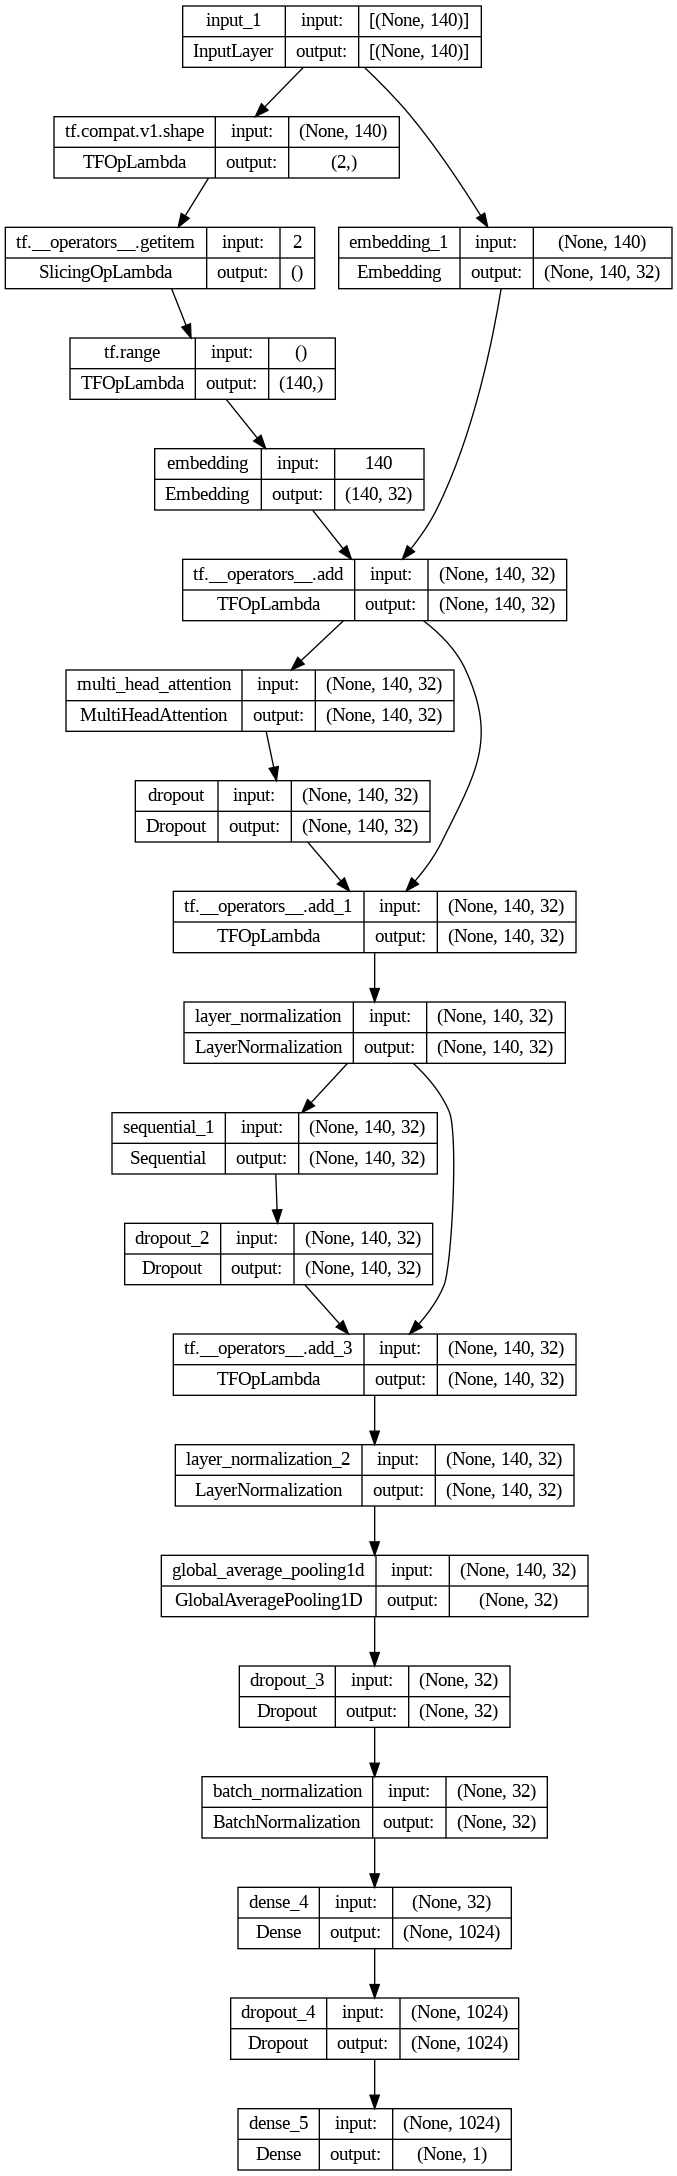

In [30]:
plot_model(model, 'model.png', show_shapes=True)

##Training

In [31]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_mean_squared_error", factor=0.75, patience=2)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_mean_squared_error",patience=10,restore_best_weights=True)

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.MeanSquaredError(), 
              metrics=[keras.metrics.MeanSquaredError(),
                       keras.metrics.RootMeanSquaredError()])

toc_ = Time.time()

history = model.fit(X_train,y_train, epochs = 100, batch_size = 256,
    validation_data = (X_val,y_val), callbacks=[reduce_lr,early_stopping]
)

tic_ = Time.time()
print("This model trained for", format((tic_ - toc_), ".2f"), 'Seconds')
history=history.history

Epoch 1/100
990/990 [==============================] - 86s 77ms/step - loss: 368.5896 - mean_squared_error: 362.8277 - root_mean_squared_error: 19.0480 - val_loss: 992.1589 - val_mean_squared_error: 986.4120 - val_root_mean_squared_error: 31.4072 - lr: 0.0010
Epoch 2/100
990/990 [==============================] - 46s 47ms/step - loss: 87.5379 - mean_squared_error: 82.2345 - root_mean_squared_error: 9.0683 - val_loss: 1030.4735 - val_mean_squared_error: 1025.5934 - val_root_mean_squared_error: 32.0249 - lr: 0.0010
Epoch 3/100
990/990 [==============================] - 44s 44ms/step - loss: 84.3997 - mean_squared_error: 79.8831 - root_mean_squared_error: 8.9377 - val_loss: 723.7736 - val_mean_squared_error: 719.6019 - val_root_mean_squared_error: 26.8254 - lr: 0.0010
Epoch 4/100
990/990 [==============================] - 42s 42ms/step - loss: 80.8577 - mean_squared_error: 76.9968 - root_mean_squared_error: 8.7748 - val_loss: 565.6869 - val_mean_squared_error: 562.1306 - val_root_mean_squ

##Evaluation

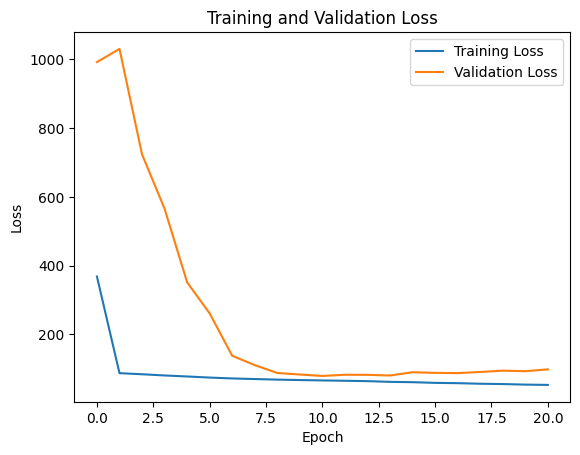

In [33]:
# Plot the loss and validation loss for the training epochs

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

# Set the plot labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



# Show the plot
plt.show()

In [34]:
# evaluation changes as you change the type of model between regression, binary classification, or multi class classification
score_train = model.evaluate(x=X_train,y=y_train, verbose=0)
print("Train binary accuracy:", score_train[1])
score_val = model.evaluate(x=X_val,y=y_val, verbose=0)
print("val binary accuracy:", score_val[1])
score_test = model.evaluate(X_test,y=y_test, verbose=0)
print("Test binary accuracy:", score_test[1])

print("Train root mean squared error:", score_train[2])
print("val root mean squared error:", score_val[2])
print("Test root mean squared error:", score_test[2])


Train binary accuracy: 59.824188232421875
val binary accuracy: 78.21298217773438
Test binary accuracy: 81.86344909667969
Train root mean squared error: 7.734609603881836
val root mean squared error: 8.843810081481934
Test root mean squared error: 9.047842025756836


##Saving the model

In [56]:
model.save('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/Age')

with open('/content/gdrive/MyDrive/High School/הנדסת תוכנה/יב/עבודת גמר/Models/Age/historyage.pickle', 'wb') as f:
    pickle.dump(history, f)

#Attempt at fine tuning

##TinyBERT

In [36]:
# model_name = "prajjwal1/bert-tiny"
# threekenizer = transformers.AutoTokenizer.from_pretrained(model_name)
# model2 = transformers.TFAutoModel.from_pretrained(model_name,from_pt=True)

In [37]:
# encoded_tweets = [threekenizer.encode(tweet, add_special_tokens=True) for tweet in base_ds['tweet_text']]

In [38]:
# padded_tweets = tf.keras.preprocessing.sequence.pad_sequences(encoded_tweets, maxlen=maxlen)

In [39]:
# # change y according to the target variable
# X_train, X_val, y_train, y_val = train_test_split(padded_tweets, base_ds[['age']], test_size=0.04, random_state=76)

In [40]:
# X_val, X_test, y_val, y_test = train_test_split( X_val, y_val, test_size=0.02, random_state=76)

In [41]:
# X_train=np.array(X_train)
# X_val=np.array(X_val)
# X_test=np.array(X_test)

###TinyBERT model

In [42]:

# def scheduler(epoch, lr):
#   if epoch==0:
#     return lr
#   return lr*0.75

# lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

In [43]:
# rate=0
# bert_layer = model2.layers[0]

# inputs = layers.Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
# x = bert_layer(inputs)[1]
# x = layers.GlobalAveragePooling1D()(tf.expand_dims(x, axis=1))
# x = layers.Dropout(rate)(x)
# outputs = layers.Dense(1)(x)

# model2 = keras.Model(inputs=inputs, outputs=outputs)

In [44]:
# model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=keras.losses.MeanSquaredError(), 
#               metrics=[keras.metrics.RootMeanSquaredError()])

# toc_ = Time.time()

# history2 = model2.fit(X_train,, y_train, epochs=3, batch_size=128,
#                       validation_data=(X_val, y_val), callbacks=[reduce_lr])

# tic_ = Time.time()
# print("This model trained for", format((tic_ - toc_), ".2f"), 'Seconds')
# history2=history2.history

##DistilBERT

In [45]:
from transformers import TFDistilBertModel, DistilBertTokenizer
threekenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# for layer in dbert_model.layers[:-1]:
#     layer.trainable = False

###Creating data

In [46]:
# padded_tweets=threekenizer.batch_encode_plus(
#     base_ds['tweet_text'].values, 
#     add_special_tokens=True, 
#     max_length=maxlen, 
#     padding='max_length',
#     truncation=True, 
#     return_attention_mask=True,
#     return_tensors='np'
# )

In [47]:
# # change y according to target variable
# X_train, X_val, y_train, y_val, mask_train, mask_val = train_test_split(padded_tweets['input_ids'], base_ds[['age']],padded_tweets['attention_mask'], test_size=0.04, random_state=76)

In [48]:
# X_val, X_test, y_val, y_test, mask_val, mask_test = train_test_split( X_val, y_val, mask_val, test_size=0.02, random_state=76)

###DistilBERT model

In [49]:
# def create_model():
#     rate=0

#     inputs = layers.Input(shape = (maxlen,), dtype='int64')
#     masks= layers.Input(shape = (maxlen,), dtype='int64')
#     dbert = dbert_model(inputs, attention_mask=masks)[0][:,0,:]
#     outputs=layers.Dense(1)(dbert)

#     model = tf.keras.Model(inputs=[inputs,masks], outputs=outputs)
#     print(model.summary())
#     return model   

In [50]:
# model2=create_model()

In [51]:
# plot_model(model2, 'model.png', show_shapes=True)

###Training

In [52]:
# def scheduler(epoch, lr):
#   if epoch==0:
#     return lr
#   return lr*0.1

# lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

In [53]:
# model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=keras.losses.MeanSquaredError(), 
#               metrics=[keras.metrics.RootMeanSquaredError()])

# toc_ = Time.time()

# history2 = model2.fit([X_train,mask_train], y_train, epochs=3, batch_size=128,
#                       validation_data=([X_val,mask_val], y_val), callbacks=[lr_scheduler])

# tic_ = Time.time()
# print("This model trained for", format((tic_ - toc_), ".2f"), 'Seconds')
# history2=history2.history

##Evaluation

In [54]:
# # Plot the loss and validation loss for the training epochs
# plt.plot(history2['loss'], label='Training Loss')
# plt.plot(history2['val_loss'], label='Validation Loss')

# # Set the plot labels and title
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.ylim([80,120])

# # Show the plot
# plt.show()

In [55]:
# score_train2 = model2.evaluate(x=[X_train,mask_train],y=y_train, verbose=0)
# print("Train root loss:", score_train2[1])
# score_val2 = model2.evaluate(x=[X_val,mask_val],y=y_val, verbose=0)
# print("val root loss:", score_val2[1])
# score_test2 = model2.evaluate(x=[X_test,mask_test],y=y_test, verbose=0)
# print("Test root loss:", score_test2[1])